# The Bayes theorem

In the previous chapter, we defined the concept of probability and probability distributions. We saw that in our experiment where we toss a coin many time, we can use the binomial distribution to obtain the likelihood of experimental outcomes given different probabilities of obtaining tails. However, as we saw in the end, while the likelihood computed with the binomial distribution function is related to how confident we should be that the coin isn't biased, it is not exactly the same. We need to be able to go from $P(y|P(X=1))$ to $P(P(X=1)|y)$. This is exacty what the Bayes Theorem enables us to do. But before introducing it, we need to revise our notation to be more general purpose. 

In our coin toss example, we would like to know the probability of obtaining head, which we wrote as $P(X=1)$. However, this notation is very specific to a problem with a binary outcome. In Bayesian inference, we are generally interested in know the value of one or several parameters $\Theta$, which happens in our coin toss problem to be $P(X=1)$. To that end, we used the binomial distribution to investigate the probability of a number of head out of a total number of throw. These are our empirical data and these are generally written as $y$. So when you read $P(y|\Theta)$, you can read 'The probability of our data given the value of our parameter of interest' and in the specific case of our coin toss example as 'The probability of getting k times head, given the probability of head'.

The Bayes theorem defined as:
$$P(\Theta|y) = \frac{P(y|\Theta)*P(\Theta)}{P(y)}$$

As you can see, it is a way to relate $P(y|\Theta)$ to $P(\Theta|y)$. You will often hear that the Bayes theorem is a mathematical framework to update our beliefs about an unknown parameter based on empirical data. This is exactly what we have been trying to do since the beginning, just phrased in a different way. We want to know if our coin is biased, and for that we run an experiment to try to decide whether it is biased or not. This is the same as saying: I believe that the coin is balanced, and I want to know whether this belief is true based on something I have observed. Not that this is also (almost) the same as saying "I believe that this coin is not balanced, and I want to know whether this belief is correct based on my observations". 

To go from $P(y|\Theta)$ to $P(\Theta|y)$, we need to multiply $P(y|\Theta)$ with $P(\Theta)$ and dividing it by $P(y)$. $P(\Theta)$ is the **prior**, and $P(y)$ is the **marginal likelihood or model evidence**. The $P(\Theta|y)$ is called the **posterior**,  because it is our updated belief in the true value of $P(\Theta)$ after seeing the data. We will now explain what these are and then we will see how we can solve the Bayes theorem for our simple problem.

## Prior distribution
The prior is the same thing as your belief, or your hypothesis about the true value of the parameter, which you want to test. If your starting hypothesis is that the coin is not biased, then you are basically saying that you believe the most probable value for theta is 0.5. If you are very certain about that, you would say: I believe the probability of $\Theta=0.5$ is 1. So for this particular coin, you are a 100% sure that it is not biased and that any other values of $\Theta$ are basically impossible. If you were to express it as a graph, then it would probably look something like this:

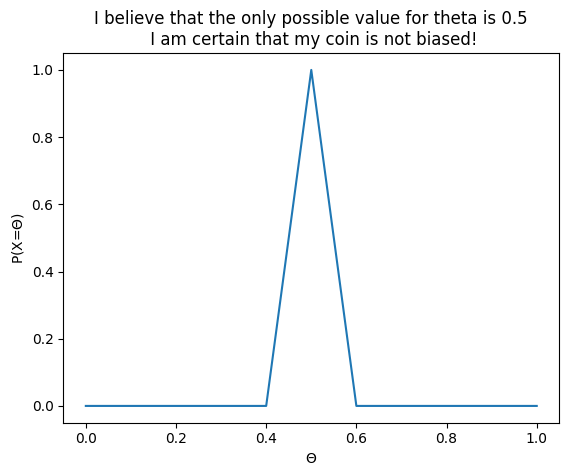

In [1]:
import matplotlib.pyplot as plt

theta_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Values of theta between 0 and 1
theta_proba  = [0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Probability of each value of theta

fig, ax = plt.subplots()
ax.plot(theta_values, theta_proba)
ax.set_xlabel("$\\Theta$")
ax.set_ylabel("P(X=$\\Theta$)")
ax.set_title("I believe that the only possible value for theta is 0.5\n I am certain that my coin is not biased!")
plt.show()
plt.close()

As we can see, this is kind of representing what we want to say, but this is not perfect. For $\Theta=0.5$, we do have a value of 1, but it looks like at $\Theta=0.45$, we don't have zero. That's to be expected. The simple way we have implemented our belief only specified values for 0.1, 0.2..., but nothing in between, so in the plot above, the dots are connected by taking a straightline between the missing points. We could for sure try to define many more points per hand, but that wouldn't be very efficient. And it would also never be perfect, except if we were to generate an infinity of points, which we of course can't do either. 

Here again, what we are looking for is a probability distribution. We want to define a function that specifies how likely we believe each value of $\Theta$ is. We believe that $\Theta=0.5$ is very likely because we believe that our coin isn't biased. Note that we could also believe something else, for example that our coin isn't balanced and that it is more likely to land on head than on tail. Either way, we need to find a function that allow us to specify a probability for any possible values of $\Theta$. And here again, we need the probability for each $\Theta<=1$ and the sum of all probablities to be one, because ultimately, there is only a single true value for $\Theta$. 

For the sake of the example, we will say that our starting hypothesis is "I believe that the coin isn't biased, therefore I believe that $\Theta$ values close to 0.5 are most likely, and values far away from 0.5 are less likely". We need to find a **probability distribution** to represent our belief about the likelihood of the $\Theta$ values. There is an infinity of mathematical function that we can use to represent our belief. The question is which one to choose? Well first of all, we need a function that is as simple as possible. There is an infinity of functions we could use, but some of them would require specifying many unintuitive parameters with complex relationships making it difficult to specify what we believe. Ideally a function that takes only a few inputs, with each input corresponding to something that makes intuitive sense would be practical. 

You might think, why not use the binomial distribution directly? The binomial distribution won't work in that case. That's because unlike the outcome of our experiment, our priors on the true value of theta doesn't depend on the number of toss we make: the true value of $\Theta$ is universaly true. There are other reasons as to why the Binomial distribution won't work in that case, but we won't go into it here, to keep things simple. 

So we need to find a formulae that encodes our belief about the probability of each value of $\Theta$, and that function should be simple to work with. There is another thing to consider when selecting a prior: how well does it work with the likelihood we have defined? In the case of our coin toss example, we said that the likelihood is a binomial distribution. For other problems, we will use different likelihood functions. As you see in the Bayes theorem, to obtain the **posterior**, we will need to multiply the **likelihood** with our **prior** and divide the whole thing by the **marginal likelihood**. And as we will see below, depending on which pair of distribution we use as prior and likelihood, doing all of that might be easy, complicated or even impossible. This means that if we can, we should choose a distribution for the **prior** that will make the math down the line easy if we can. Pairs of distributions that work well together are called **conjugate**, and when trying to define a prior, you should first look at whether there is a prior that is the conjugate of the likelihood function you use for your problem. If there is, go for it. As we will see later, very often, there isn't and it is for such cases that we need to use advanced maths like variational Laplace.

### Beta distribution
For the Binomial likelihood, a conjugate does exists, and it is the beta distribution. It is defined like so:

$$f(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{B(\alpha, \beta)}$$

Where:

$$B(\alpha, \Beta)=\frac{\Gamma(\alpha)\Gamma(\Beta)}{\Gamma(\alpha+\beta)}$$

Where:

$$\Gamma(n) = (n-1)!$$

Okay, ouch. So the $\beta$ distribution is a function which consists of another function, and that other function also contains another function, and we have three different greek letter... That looks intimidating. But in fact, it is really quite alright, you just need to spend time to look at it carefully. And in fact, the reason why we have three functions defined above is just because mathematicians are also frightned by long formulae, so they break them down in bits and pieces that makes it easier to manage for them as well. If that makes you feel better, you can also rewrite the beta distribution in one line:

$$f(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{\frac{(\alpha-1)!(\beta-1)!}{(\alpha + \beta -1)!}}$$

The way I have written the $\Gamma$ function above is a bit of a simplification. The formulae I wrote will only work for integer values (1, 2, 3...). But there is a more general form that looks a little bit more complicated that will work for basically any number, but let's keep the math simple for now.

And we can write the beta distribution as a piece of code:

In [2]:
from math import gamma

def beta_distribution(theta, alpha, beta):
    """
    Compute the probability density of the Beta distribution at a given value theta for parameters alpha and beta.

    The Beta distribution is defined as:
        Beta(theta, alpha, beta) = (theta^(alpha - 1) * (1 - theta)^(beta - 1)) / B(alpha, beta)

    where B(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta).
    
    Parameters:
        theta (float): The value at which to evaluate the Beta distribution (0 <= theta <= 1).
        alpha (float): The shape parameter alpha (> 0).
        beta (float): The shape parameter beta (> 0).

    Returns:
        float: The probability density of the Beta distribution at x.
    """
    # Ensure x is within the valid range
    if theta < 0 or theta > 1:
        raise ValueError("x must be between 0 and 1.")
    if alpha <= 0 or beta <= 0:
        raise ValueError("alpha and beta must be positive.")
    
    # Compute the denominator:
    denom = (gamma(alpha) * gamma(beta))/(gamma(alpha + beta))  # The Beta(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta) above. And instead of using the factorial, we are using the gamma function that will work with any numbers

    # Compute the numerator:
    numer = theta ** (alpha - 1)*(1-theta)**(beta-1)

    # Return the probability of beta at this particular value of x with alpha and beta:
    return numer/denom 

That doesn't seem all that crazy after all now does it? You might still wonder what the alpha and beta parameters are for. Well these are parameters you can adjust to control the shape of the distribution. Let's try to play around with alpha and beta to get a sense of what they do:

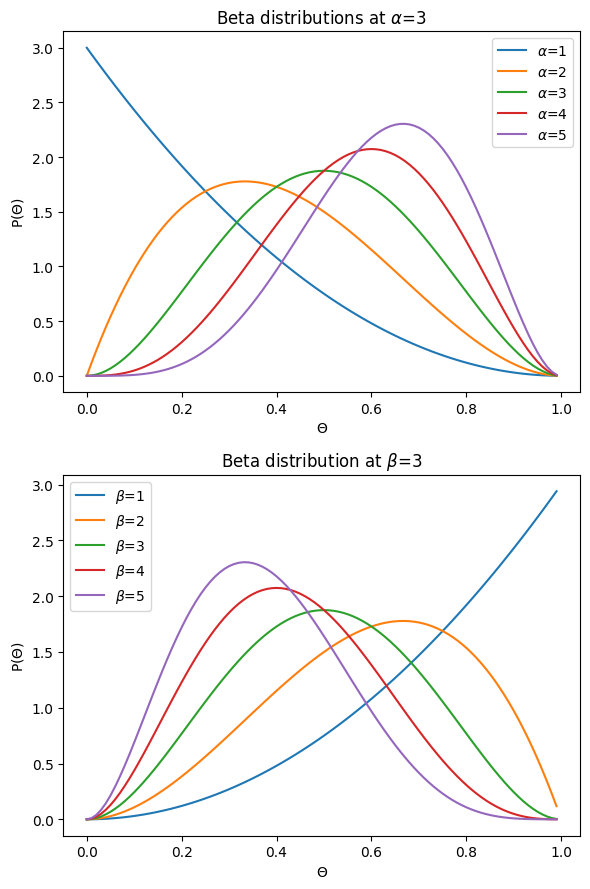

In [3]:
import numpy as np

thetas = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [1, 2, 3, 4, 5]  # Try values of alpha from 1 to 5
betas = [1, 2, 3, 4, 5]  # Try values of beta from 1 to 5

fig, ax = plt.subplots(2,1, figsize=[6, 9])

# Vary alpha:
for alpha in alphas:
    ax[0].plot(thetas, [beta_distribution(theta, alpha, 3) for theta in thetas], label=f"$\\alpha$={alpha}")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_ylabel("P($\\Theta$)")
ax[0].set_title("Beta distributions at $\\alpha$=3")
ax[0].legend()
# Vary beta:
for beta in betas:
    ax[1].plot(thetas, [beta_distribution(theta, 3, beta) for theta in thetas], label=f"$\\beta$={beta}")
ax[1].set_xlabel("$\\Theta$")
ax[1].set_ylabel("P($\\Theta$)")
ax[1].set_title("Beta distribution at $\\beta$=3")
plt.legend()
plt.tight_layout()
plt.show()


So we can see from the graphs above that when we increase alpha, we somehow move the distribution to the right, and when we increase beta, we move the distribution to the left, and that when alpha=beta, we have a symetrical distribution. In our case, we probably want a prior that is symetrical. If we believe that the coin isn't biased, we think the most likely value is in the middle and that values on the left or on the right are equally unlikely. But in the case above, when we set alpha and beta to 3, the distribution is quite wide, which would mean that we believe that while we believe $\Theta=0.5$, we wouldn't be crazy surprised to learn that it is as large as 0.8, or as low as 0.2. That doesn't seem to match our initial assumption that we are very confident that the coin isn't biased. Let's try other values:

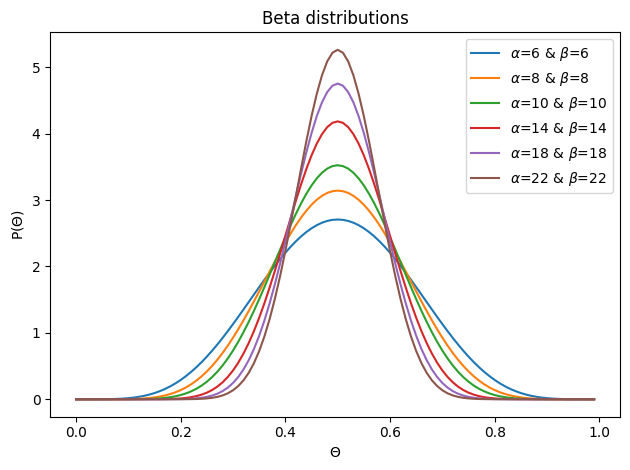

In [4]:
thetas = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [6, 8, 10, 14, 18, 22]  # Try values of alpha
betas = [6, 8, 10, 14, 18, 22]  # Try values of beta

fig, ax = plt.subplots()

# Vary alpha:
for i, alpha in enumerate(alphas):
    ax.plot(thetas, [beta_distribution(theta, alpha, betas[i]) for theta in thetas], label=f"$\\alpha$={alpha} & $\\beta$={betas[i]}")
ax.set_xlabel("$\\Theta$")
ax.set_ylabel("P($\\Theta$)")
ax.legend()
ax.set_title("Beta distributions")
plt.legend()
plt.tight_layout()
plt.show()


The larger alpha and beta are, the tighter the distribution seems to be getting. Let's take the values of $\alpha=22, \beta=22$, which means we are initially quite confidence that the true value of $\Theta=0.5$.

You might wonder: "Why does it matter how confident I am in my original value? I get the value I get in my experiment, and I will just believe what the experiments tells me". First of all, we have already seen that the experiment might very well give you something else than the true value, and you shouldn't accept blindly the results of your experiment as the ultimate truth. How much you should trust the results of your experiment very much depend on how much you trust your initial guess. Let's take the example of a 52 cards deck. Say you have counted each of the cards and confirmed: I have 4 Queens, 4 kings, 4 jacks... In that case, say you want to run an experiment what the probability is to get a king if you draw a card at random. Your prior should be something like that:

$$P(\Theta) = 4/52$$

Where $P(\Theta)$ is the prior probability of drawing a king, which 4/52, because you know you have 4 kings out of 52 cards. Now say you draw cards many many times, and somehow you end up with an observed $\hat{P}(\Theta)=0.5$. In that scenario, you of course wouldn't believe that the results of the experiment, because you know for a fact that $P(\Theta)=4/52$. So in that example, you shouldn't change your mind all that much based on experimental results, because you have very high confidence of what the true $P(\Theta)$ is. In fact, you have absolute confidence in it: you know for a fact that the probability of $P(\Theta)=4/52$ is 1 while any other values is 0, which is just a very particular probability distribution, which is very peaky. 

This is why, if you want to know the value of a parameter(s) of interest given empirical results ($P(\Theta|y)$), you should always factor in your prior, because it is going to influence the conclusion quite a bit. 

## Combining the prior and the likelihood
So we now know what the two following components are and what they are for in the quest of answering our question of whether a coin is biased:
- $P(y|\Theta)$: Likelihood (of the observed values given any value of $\Theta$)
- $P(\Theta)$: Prior, our belief about the likelihood of each $\Theta$ for our coin

To compute the numerator of the Bayes theorem, we need to mupltiply the prior with our likelihood. We have the following formulae for the likelihood:

$$P(y | \Theta) = \binom{n}{y} \Theta^y (1 - \Theta)^{n - y}$$

Where $n$ and $y$ are the number of throws and the number of success in our experiment, respetively. Let's say we fix our number of throw at a thousand. 

The prior is defined as a beta distribution like so:

$$P(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{B(\alpha, \beta)}$$

Where $alpha$ and $beta$ depend on our degree of confidence, which we said should be $\alpha=22, \beta=22$. When you put the two distributions together, you might notice that they are quite similar. In fact, we can rewrite the prior distribution as follows to make it obvious:

$$P(\Theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\Theta^{\alpha-1}(1-\Theta)^{\beta-1}$$

Everything after the fraction is kind of the same as the binomial distribution. Or you could say that the two distributions are the same, just multiplied by different things: 
- The binomial distribution is something multiplied by the binomial coefficient $\binom{n}{k}$
- The beta distribution is a similar something, multiplied by a ratio of beta function (illustrated with $\Gamma$ above)

The something that is common to both is something like this:

$$x^{a}(1-x)^b$$

This something is a beta kernel. In general, when you see an expression like this multiplied by something else, it will take the shape of a beta function, similar to what we have above.

### Solving the numerator

To calculate the posterior, we need to solve the numerator:

$P(y|\Theta)P(\Theta)$

This requires a bit of maths. It's nothing complicated, just plugging in the formula of each term and rearranging stuff following the rules of mathematics, so that we we end up with a compact and simple formulae. But note that you don't even have to do any of that. You could very well write a chunky function just based on the multiplication of the two formulae and that would be totally fine. But that way, we can write the function more compactly and elegantly. Feel free to skip, but please don't skip because you are intimidated by maths, it is really simple, believe in yourself!

We can replace the formulae:

$$P(y|\Theta)P(\Theta) = [\binom{n}{k}\Theta^k(1-\Theta)^{n-k}][\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\Theta^{\alpha-1}(1-\Theta)^{\beta-1}]$$

First, we can take out all the bits that don't involve $\Theta$:
$$C=\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}$$

So we have:

$$P(y|\Theta)P(\Theta) = C[\Theta^k(1-\Theta)^{n-k} \times \Theta^{\alpha-1}(1-\Theta)^{\beta-1}]$$

We can now combine the exponents of $\Theta$ and $(1-\Theta)$

$$P(y|\Theta)P(\Theta) = C[\Theta^{k+\alpha -1}(1-\Theta)^{n-k+\beta-1}]$$

### Another beta distribution
The final formulae once again looks quite familiar. We again have a beta kernel:

$$P(y|\Theta)P(\Theta) = C\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}$$

Where:

$$\alpha' = k+\alpha$$

$$\beta' = n-k+\beta$$

This implies that the numerator is going to be a beta distribution as well. As we will see in a little bit, the denominator (i.e. the marginal likelihood) is a constant with respect to $\Theta$ as you can already guess from the formulae. This means that the numerator will not have an impact on the kind of distribution of the posterior, simply scale it up and down. Accordingly, the family of distribution the posterior follows is dictated by the numerator. And to complete the story, when we mean that the prior is a conjugate prior, we mean that for a given likelihood function, the posterior is in the same probability distribution family as the prior. 

### The combined prior and likelihood
In the combined formulae of the prior and the likelihood, the quantity C does not depend on $\Theta$. This implies that the value of C is the same for any value of $\Theta, and accordingly will not impact the shape of the distribution, it will only scale it up or down. This is why it is not strictly neccessary to compute it. 

In [5]:
from math import comb

def binomial_distribution(n, k, p):
    '''
    Calculate the binomial probability P(X = k) for n trials, k successes, and success probability p.
    P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
    :param n: Total number of trials
    :param k: Number of successes
    :param p: Probability of success on a single trial
    :return: Binomial probability P(X = k)
    '''
    # Calculate the binomial coefficient (n choose k)
    binom_coeff = comb(n, k)  # Calculate n choose k: \binom{n}{k}
    
    # Calculate the binomial probability using the formula
    probability = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    
    return probability

def constant_C(n, k, alpha, beta):
    """
    Compute the constant C in the product of the likelihood and prior.

    Parameters:
    n (int): Total number of trials.
    k (int): Number of successes observed.
    alpha (float): Alpha parameter of the Beta prior.
    beta (float): Beta parameter of the Beta prior.

    Returns:
    float: The computed constant C.
    """
    binom_coeff = comb(n, k)
    # Corrected the denominator to be the product, not the sum
    beta_ratio = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    return binom_coeff * beta_ratio


def likelihood_times_prior(theta, n, k, alpha, beta):
    """
    Compute the unnormalized posterior, which is the product of the likelihood and the prior.

    Parameters:
    theta (float): The parameter value at which to evaluate.
    n (int): Total number of trials.
    k (int): Number of successes observed.
    alpha (float): Alpha parameter of the Beta prior.
    beta (float): Beta parameter of the Beta prior.

    Returns:
    float: The unnormalized posterior density at theta.
    """
    C = constant_C(n, k, alpha, beta)
    alpha_prime = k + alpha
    beta_prime = n - k + beta
    return C * theta**(alpha_prime - 1) * (1 - theta)**(beta_prime - 1)


def likelihood_times_prior_n_c(theta, n, k, alpha, beta):
    """
    Compute the unnormalized posterior, which is the product of the likelihood and the prior.

    Parameters:
    theta (float): The parameter value at which to evaluate.
    n (int): Total number of trials.
    k (int): Number of successes observed.
    alpha (float): Alpha parameter of the Beta prior.
    beta (float): Beta parameter of the Beta prior.

    Returns:
    float: The unnormalized posterior density at theta.
    """
    alpha_prime = k + alpha
    beta_prime = n - k + beta
    return theta**(alpha_prime - 1) * (1 - theta)**(beta_prime - 1)


Now let's try to calculate the numerator with different values. We will keep our orgininal alpha and beta the same as berore, 22 and 22 each. And let's say that we throw the coin a 100 times and we get 40 times head:

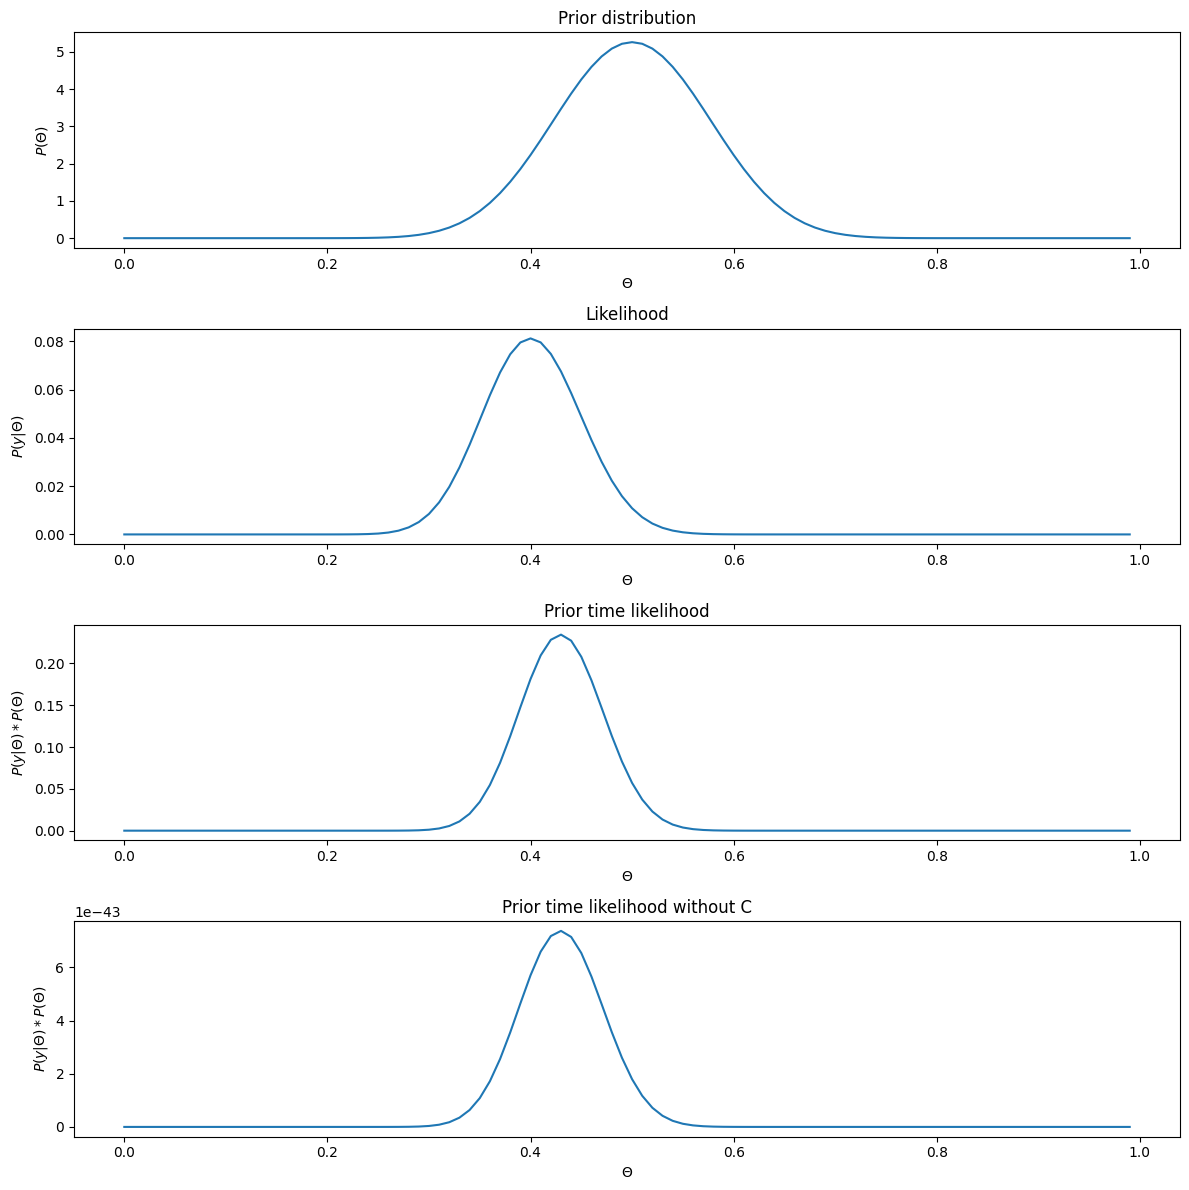

In [6]:
alpha = 22  # Our prior confidence for the theta value
beta = 22  # Our prior confidence for the theta value
n = 100  # Say we run an experiment in which we throw the coin a 1000 times
k = 40  # Say we get a hypothetical 400 heads:

thetas = np.arange(0, 1, 0.01)

fig, ax = plt.subplots(4, figsize=(12, 12))
ax[0].plot(thetas, [beta_distribution(theta, alpha, beta) for theta in thetas], label=f"$\\alpha$={alpha} & $\\beta$={beta}")
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

ax[1].plot(thetas, [binomial_distribution(n, k, theta) for theta in thetas])
ax[1].set_ylabel("$P(y|\\Theta)$")
ax[1].set_xlabel("$\\Theta$")
ax[1].set_title("Likelihood")

ax[2].plot(thetas, [likelihood_times_prior(theta, n, k, alpha, beta) for theta in thetas])
ax[2].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[2].set_xlabel("$\\Theta$")
ax[2].set_title("Prior time likelihood")

ax[3].plot(thetas, [likelihood_times_prior_n_c(theta, n, k, alpha, beta) for theta in thetas])
ax[3].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[3].set_xlabel("$\\Theta$")
ax[3].set_title("Prior time likelihood without C")
plt.tight_layout()
plt.show()
plt.close()

We can clearly see that the distribution has the exact same shape, with and without the constant. The only difference are the values on the y axis. This brings us to the next part of the equation: with and without the scaling, the sum of the probablities over all values of $\Theta$ do not add up to 1. That is the role of the denominator (P(y)), which acts as a normalizing constant to make sure that the distribution sums up to 1. We will get to this in a bit. But before, let's look at the results we have above to note a few interesting things. 

We can see that all the multplication between the prior and the likelihood seems to give something in between the two, an average of sorts. This is to be expected. As we discussed before, if you have very strong belief about something (say the probability of picking a king of heart in a 52 cards deck that you know if balanced), you should not take the results of your experiment (here shown as the likelihood) at face value. In the current case, the posterior doesn't take the same shape as the likelihood because we wouldn't want to change our mind about whether or not the coin is biased based on the outcome of a single experiment, if we have reasonable reasons to believe that the coin is most probably not biased. It would seem logical to suggest that we should only change our minds if we have a lot of data that doesn't match our belief, or if we don't have a strong belief to start with. Turns out that that's exactly how the multiplication of the prior and likelihood behaves. We can illustrate that by keeping everything the same but using more or less strong priors, or keeping the prior the same but increasing the amount of data we have:

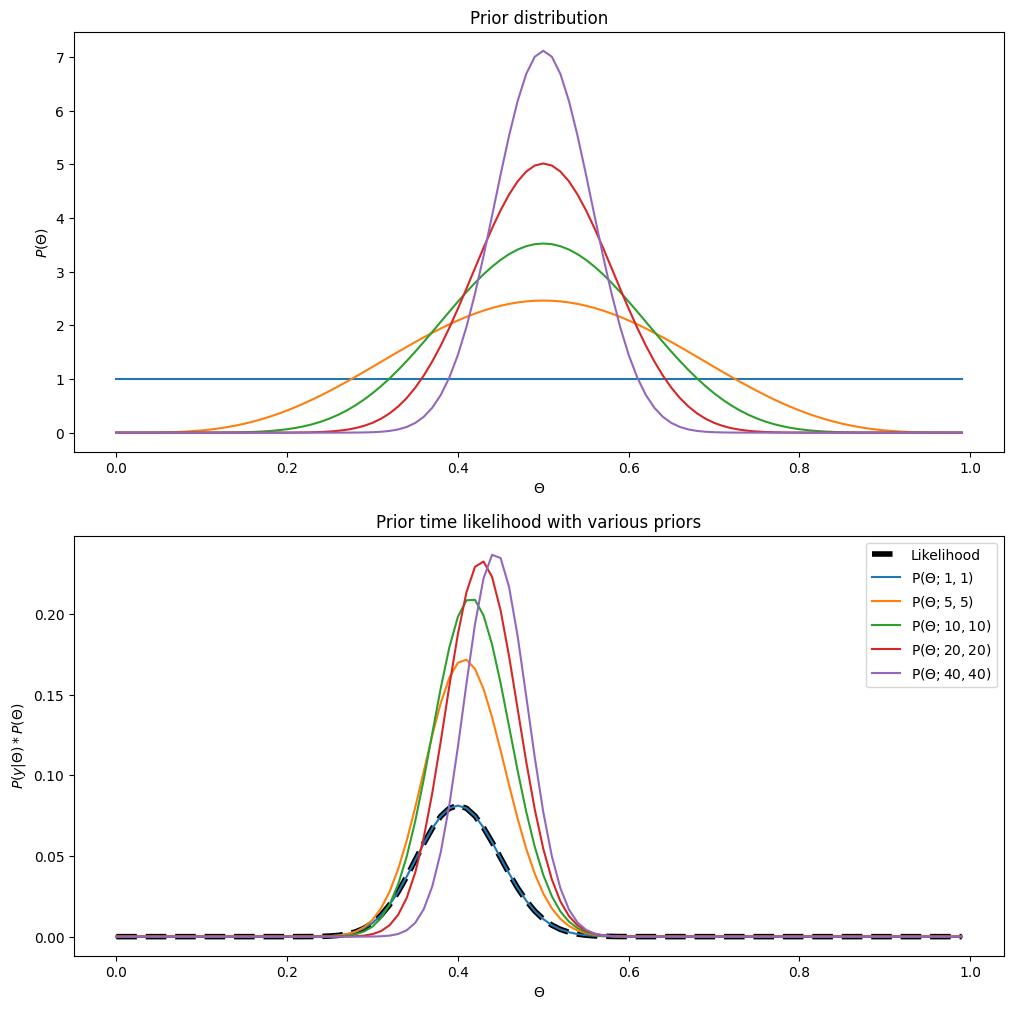

In [7]:
# Modulating prior 'tightness':
alphas = [1, 5, 10, 20, 40]  # Our prior confidence for the theta value
betas = [1, 5, 10, 20, 40]  # Our prior confidence for the theta value
n = 100  # Say we run an experiment in which we throw the coin a 1000 times
k = 40  # Say we get a hypothetical 400 heads:

thetas = np.arange(0, 1, 0.01)

fig, ax = plt.subplots(2, figsize=(12, 12))
for i, alpha in enumerate(alphas):
    ax[0].plot(thetas, [beta_distribution(theta, alpha, betas[i]) for theta in thetas], label=f"$\\alpha$={alpha} & $\\beta$={betas[i]}")
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

ax[1].plot(thetas, [binomial_distribution(n, k, theta) for theta in thetas], 'k', linestyle='--', label='Likelihood', linewidth=4)
for i, alpha in enumerate(alphas):
    ax[1].plot(thetas, [likelihood_times_prior(theta, n, k, alpha, betas[i]) for theta in thetas], label=f"P($\\Theta; {alpha}, {betas[i]}$)")
ax[1].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[1].set_xlabel("$\\Theta$")
ax[1].set_title("Prior time likelihood with various priors")
plt.legend()
plt.show()
plt.close()

We can see quite clearly in the plot above the the least 'tight' our prior is, the most the outcome ends up being something close to the likelihood (the black dashed line). In fact, if we set a prior with $\alpha=1$ and $\beta=1$, the results is exactly the same as the likelihood. Again, that's how you would want it to behave. As you can see in the upper plot, setting $\alpha=1$ and $\beta=1$ is basically saying that you believe that any possible values of $\Theta$ are equally likely a priori, or in other words, you have no idea what the value of $\Theta$ could be. In Bayesian Linguo, we say that very tight priors are very **informative**, and you will often hear things like **mildly informative priors**, **mildly informative priors**. These all refers to how tight the prior is. 

As much as a tight prior pulls the data closer to the prior, the amount of data used to generate the likelihood pulls the outcome towards the data. That also makes sense: you should be more willing to change your mind if you see a lot of data. That's exactly what our intuition told us initially: we should trust estimates about $P(X=1)$ more if it comes from experiments where we threw the coin many many times. This is also how the multiplication between the prior and the likelihood behaves:

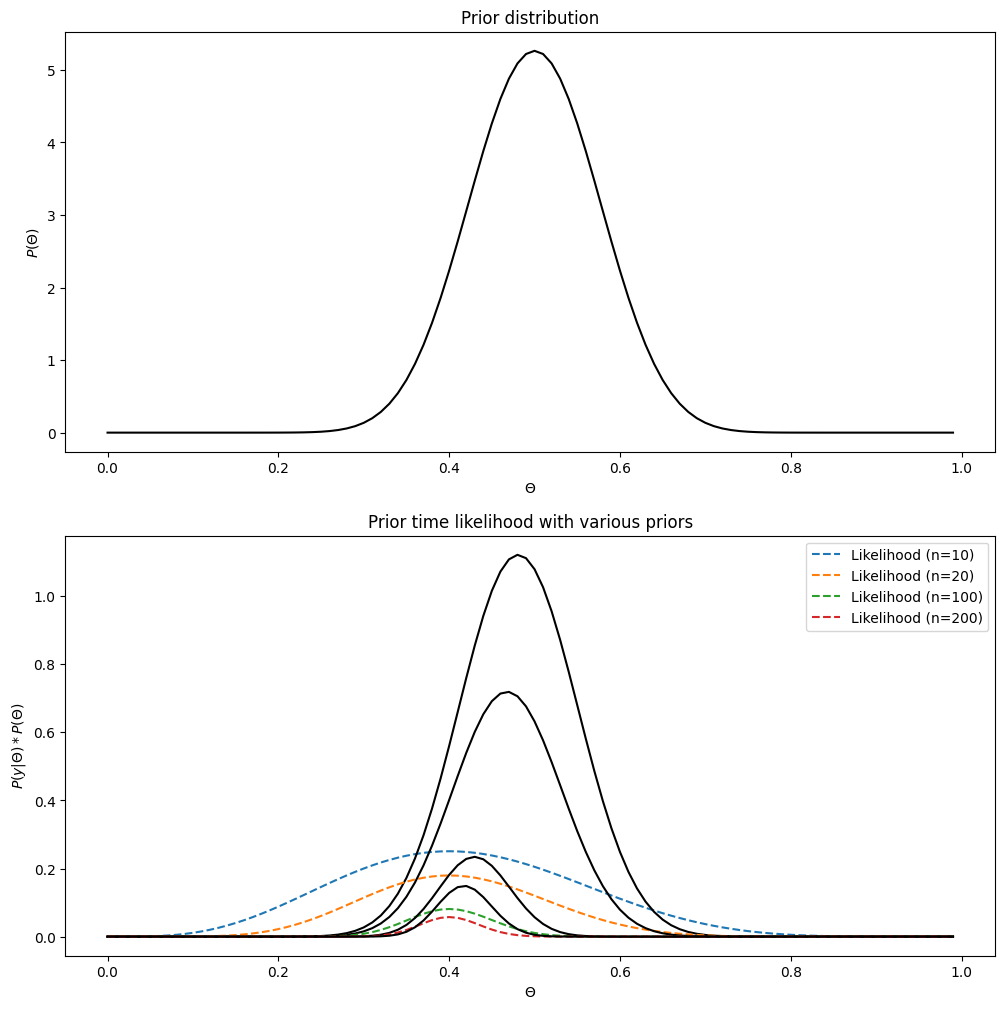

In [8]:
# Modulating prior 'tightness':
alpha = 22
beta = 22
n = [10, 20, 100, 200]  # Say we run an experiment in which we throw the coin a 1000 times
k_per_n_throw = 0.4  # Say we get 40% head when we throw the coin 10, 20, 100, 200 times

thetas = np.arange(0, 1, 0.01)

fig, ax = plt.subplots(2, figsize=(12, 12))
ax[0].plot(thetas, [beta_distribution(theta, alpha, beta) for theta in thetas], 'k')
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

for i in n:
    ax[1].plot(thetas, [binomial_distribution(i, int(k_per_n_throw*i), theta) for theta in thetas], linestyle='--', label=f'Likelihood (n={i})')
    ax[1].plot(thetas, [likelihood_times_prior(theta, i, int(k_per_n_throw*i), alpha, beta) for theta in thetas], 'k')
ax[1].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[1].set_xlabel("$\\Theta$")
ax[1].set_title("Prior time likelihood with various priors")
plt.legend()
plt.show()
plt.close()

## Marginal likelihood, a.k.a. model evidence
The numerator controls the overall shape of the distribution. As you can see in the examples above, it seems to behave in the way we would expect our **posterior** to behave. Remember, the posterior is what we are after, as it basically tells us how confident we should be in a given value of $\Theta$ given our data: if the value of $\Theta$ is highly likely given the data, then we should conclude that our coin isn't biased. The posterior, like every other bits of the Bayes theorem is a probability distribution. But you may have noticed that the results in the plot above don't seem to quite fit the bill. That's because the numerator alone doesn't sum up to 1. And we saw before that any probability distribution must satisfy:

$$\int{P(\Theta|y)}d\Theta = 1$$

This means that when we sum up the probability of any values of $\Theta$, we should get 1. You might have expected to see $\sum$ here instead of $\int$. The term $\int$ is basically an extension of  $\sum$, as it also works when $\Theta$ is continuous (i.e. can take an infinity of values within a range). This is what the denominator in the Bayes theorem does: it enforces that the final product is a distribution that sums up to 1. In other words, we need to normalize the nummerator by dividing it by something so that it sums up to 1. This is why the marginal likelihood/model evidence is referred to as the normalizing constant in some cases.

The marginal likelihood is defined as:

$$P(y) = \int{P(y|\Theta)P(\Theta)}{d\Theta}$$

In other words, the denominator is the integral of the numerator. It is called the marginal likelihood, because it consists in obtaining the probabity of $y$ while marginalizing over all possible values of $\Theta$, weighted by their prior probability $P(\Theta)$

### Deriving the marginal likelihood for our problem
Once again, eventhough the formulae might look intimidating, it is nothing crazy. We just need to plug in the right formulae in the right place, to see how we can then find the integral of that:

$$P(y) = \int[\binom{n}{k}\Theta^k(1-\Theta)^{n-k}][\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\Theta^{\alpha-1}(1-\Theta)^{\beta-1}]$$

Same deal as before, we can take out the constants that aren't concerned by $\Theta$, given that we integrate over $\Theta$:

$$P(y) = \binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\int{\Theta^{k+\alpha-1}(1-\Theta)^{n-k+\beta-1}}d\Theta$$

And just as was the case before, what we end up having to integrate is also a Beta function:

$$P(y) = \binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\int{\Theta^{\alpha'-1}(1-\Theta)^{\beta'-1}}d\Theta$$

where:

$$\alpha'=k+\alpha$$

and

$$\beta'=n-k+\beta$$

So we only need to find the integral of that beta distribution. The math behind it is a bit long and complicated (see [here](https://en.wikipedia.org/wiki/Beta_function) if you want the full derivations), but it turns out that the derivatives of any beta function is:

$$\int{\Theta^{\alpha'-1}(1-\Theta)^{\beta'-1}}d\Theta=\frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha' + \beta')}$$

That probably seems very familiar, doesn't it? We have indeed seen the right hand side of that formulae many times. Whenever we wrote the $\beta$ distribution, we saw something like this. Indeed, a $\beta$ distribution is defined like so (see above as well):

$$f(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{B(\alpha, \beta)}$$

Where:

$$B(\alpha, \Beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$

Or:

$$\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\Theta^{\alpha-1}(1-\Theta)^{\beta-1}$$

But actually, that makes perfect sense when you look at the first expression. You have the top part that looks like this:

$$\Theta^{\alpha-1}(1-\Theta)^{\beta-1}$$

But this bit on its own doesn't sum up to 1. To get that to sum up to 1, you also need to normalize it by dividing it by the integral of the numerator. So you need to divide ${\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}$ by $\int{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}$ to give it a probability distribution. And this is why in the formulae above, we divide ${\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}$ by $B(\alpha, \beta)$, because $B(\alpha, \beta)$ is the integral of the numerator. 

So that's it, we've solved the denominator:
$$P(y) = \binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\times\frac{\Gamma(k+\alpha)\Gamma(n-k+\beta)}{\Gamma(k+\alpha+n-k+\beta)}$$

### Python implementation of the likelihood

That was quite a bit of maths. But hopefully by getting a detailed overview, you understand that there is nothing too crazy about it. Sure the trick of know that the integral we were looking for was actually the beta function is something you need to know. Alternatively you could try to come up with the integral for that function, but I will grant you that it takes quite a bit of skills in mathematics (I wouldn't be able to do it myself). But hopefully you got the sense that it isn't too crazy complicated either, just high school level maths.

We can now implement the function to compute the marginal likelihood for out specific problem:

In [9]:
def marginal_likelihood(n, k, alpha, beta):
    # Binomial coefficient, n chooses k
    binom_coeff = comb(n, k)
    # Ratio of gammas with alpha and beta
    gammas_ratio1 = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    # Ratio of gammas with alpha' and beta'
    gammas_ratio2 = (gamma(k + alpha) * gamma(n - k + beta)) / gamma(n + alpha + beta)  # The k gets removed

    return binom_coeff * gammas_ratio1 * gammas_ratio2

Nothing too crazy, is it? Now we have all the building blocks to compute our posterior.

## Putting everything together: computing the posterior
Now we have all the pieces necessary to compute the posterior. To recap, we have the following formulae for the numerator:
$$P(y|\Theta)P(\Theta) = C\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}$$

Where:

$$\alpha' = k+\alpha$$

$$\beta' = n-k+\beta$$

$$C=\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}$$

For the denominator, we have this:

$$P(y) = \binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\times\frac{\Gamma(k+\alpha)\Gamma(n-k+\beta)}{\Gamma(k+\alpha+n-k+\beta)}$$

We can stop it right there with the math. We already have a function to compute the numerator and the denominator, so we can compute each separately and get our posterior (spoiler alert, we will get back to the math a bit later).

So let's put everything together by creating a function that takes in the parameters and returns the posterior probabilty:

In [10]:
def compute_posterior(theta, n, k, alpha, beta):
    # Compute the numerator:
    num = likelihood_times_prior(theta, n, k, alpha, beta)

    # Compute the denominator, i.e. the model evidence:
    model_evidence = marginal_likelihood(n, k, alpha, beta)

    return num/model_evidence, model_evidence

Finally, we can answer our question: is the coin biased? For that, let's run an experiment again, where we throw the coin a 10 times and compute the posterior by fixing our prior to be a beta distribution with $\alpha=0.5$ and $\beta=0.5$:

In [11]:
def coin_toss(n, verbose=False, bias=0):
    """
    Simulate teh results of throwing a coin by taking n times a random number between 0 and 1 and it is smaller than 0.5, say it is head
    Parameters:
    n (float): how often we throw the coin
    Returns:
    k: total number of heads
    """
    k = 0 # Before we start, we have zero head

    for i in range(n):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform() + bias  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            if verbose:
                print(f"Throw {i}: Head")
            k += 1
    
    return k

We obtained 4 heads out of 10 tosses


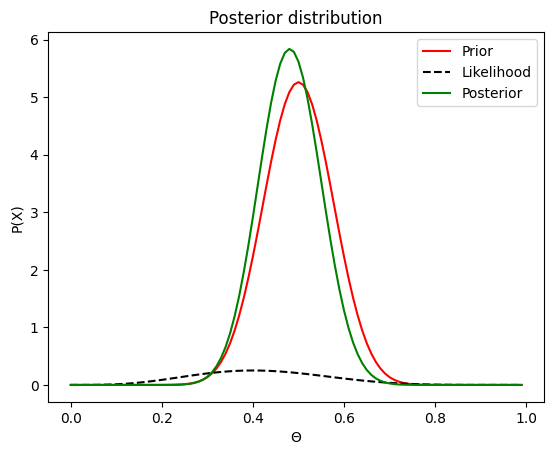

In [12]:
# Define all our parameters:
n = 10  # How often we throw our coin 
alpha = 22  # Our prior about the values of theta
beta = 22  # Our prior about the values of theta
thetas = np.arange(0, 1, 0.01)  # Define a range for theta for plotting purposes

# Let's run the experiment:
k = coin_toss(n, verbose=False)
print(f"We obtained {k} heads out of {n} tosses")

# Now that we have some data, let's compute the posterior:
posterior = [compute_posterior(theta, n, k, alpha, beta)[0] for theta in thetas]

# Let's plot the results:
fig, ax = plt.subplots()
ax.plot(thetas, [beta_distribution(theta, alpha, beta) for theta in thetas], 'r', label='Prior')
ax.plot(thetas, [binomial_distribution(n, k, theta) for theta in thetas], 'k', linestyle='--', label='Likelihood')
ax.plot(thetas, posterior, 'g', label='Posterior')
ax.set_xlabel('$\\Theta$')
ax.set_ylabel('P(X)')
ax.set_title('Posterior distribution')
plt.legend()
plt.show()
plt.close()

One thing you probably notice off the bat is that the probability returned by the likelihood function are smaller than that of the prior and posterior. And even weirder, both for the prior and the posterior, there are values that are higher than 1, eventhough we said that a probability distribution must sum up to 1, how can that be? Well for sake of simplicity I omitted a few things. There is a fundamental difference between the distribution we use for the likelihood and the distributions of the prior and posterior. The likelihood is a discrete probability distribution. When we throw the coin n times, there is a finite number of outcomes k: 0 to n. And for each of these outcome, we have a probability. If we take the sum of all these probabilities, we must get one:

$$\sum\limits_{k=0}^nP(X=k) = 1$$

Accordingly, with such a distribution, the more throw we make, the smaller the value of each outcome ends up being. The binomial distribution is what we call a **probability mass function (PMF)** and each value k has a positive probability. In comparison, both the prior and posterior distributions are Beta distribution which ascribe to each possible values of $\Theta$ a probability. $\Theta$ is continuous, it can take an infinity of values between 0 and 1. Because $\Theta$ can take an infinity of values between 0 and 1, the probability of any one value of $\Theta$ is 0. Indeed, it is impossible to get exactly 0.5. When dealing with probability distribution of continuous variables, we talk about **probability density function**, because such functions actually inform us about the probability of the value of $\Theta$ to be between two points. If this is unclear to you, I strongly recommend you check out this [youtube tutorial](https://www.youtube.com/watch?v=hDjcxi9p0ak), which should give you a good intuition about it!

I purposefully displayed the graph above to illustrate that point, but to make things a bit easier to visualize, we can set the likelihood on a different axis:

We obtained 4 heads out of 10 tosses
We obtained 4 heads out of 10 tosses
We obtained 3 heads out of 10 tosses
We obtained 7 heads out of 10 tosses


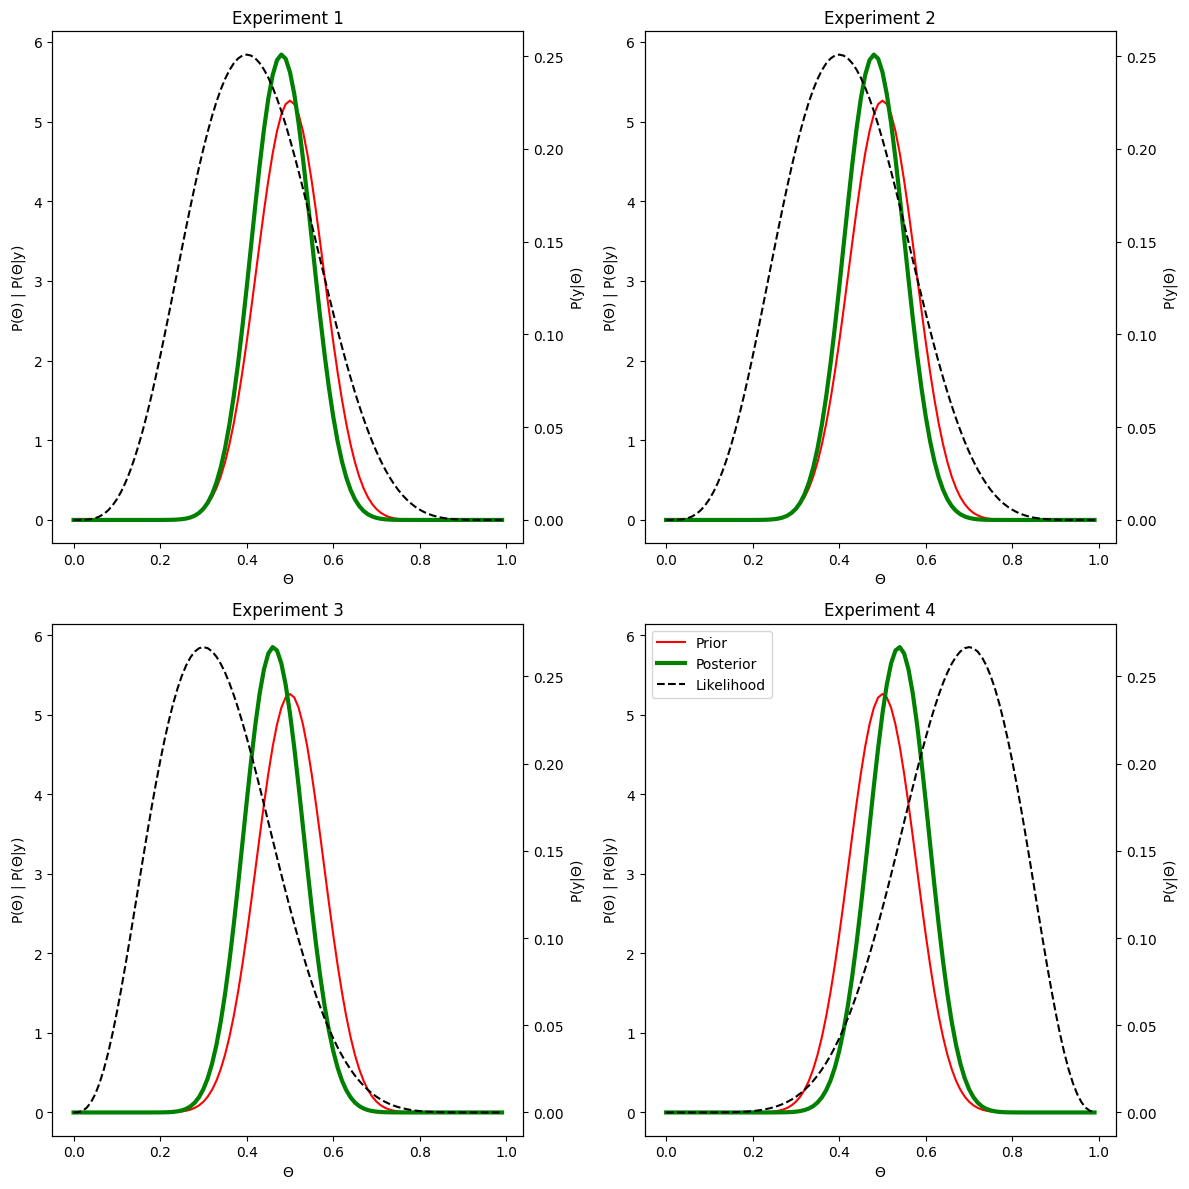

In [13]:
# Define all our parameters:
n = 10  # How often we throw our coin 
alpha = 22  # Our prior about the values of theta
beta = 22  # Our prior about the values of theta
thetas = np.arange(0, 1, 0.01)  # Define a range for theta for plotting purposes

# Let's run the experiment 4 times in a row:

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

for i in range(4):
    k = coin_toss(n, verbose=False)
    print(f"We obtained {k} heads out of {n} tosses")

    # Now that we have some data, let's compute the posterior:
    posterior = [compute_posterior(theta, n, k, alpha, beta)[0] for theta in thetas]

    # Plot the likelihood:
    ax2 = ax[i].twinx()
    ax2.plot(thetas, [binomial_distribution(n, k, theta) for theta in thetas], 'k', linestyle='--', label='Likelihood')
    ax2.set_ylabel('P(y|$\\Theta$)')
    # Plot the prior
    ax[i].plot(thetas, [beta_distribution(theta, alpha, beta) for theta in thetas], 'r', label='Prior')
    # Plot the posterior:
    ax[i].plot(thetas, posterior, 'g', label='Posterior', linewidth=3)
    ax[i].set_xlabel('$\\Theta$')
    ax[i].set_ylabel('P($\\Theta$) | P($\\Theta$|y)')
    
    ax[i].set_title(f'Experiment {i+1}')

lines, labels = ax[i].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()
plt.show()
plt.close()

That way it's a bit easier to read. In the figure above, we run the same experiment three times in a row to show that depending on the outcome of the experiment, while our prior remains the same, the likelihood may change depending on the randomness involved in our experiment, which results in different posterior. That all make sense: if you get in one experiment 3/10 heads, then you have more reasons to believe that your coin is biased compared to getting 5/10 heads, make sense. 

So now we have our posterior, which tells us how confident we can be that our coin isn't biased. But wait a minute, how exactly are you supposed to answer the question based on the posterior? It would seem from the plots above that the closer your observations were from a ratio of 5/10, the more centered your posterior is on 0.5, so it would seem that you should be more confident in those results. However, because $\Theta$ is a continuous variable which can take any values between 0 and 1, we know that the probability of your coin having a probability of head of exactly 0.5 is exactly 0. This sounds like you should actually be certain that your coin is biased? This is probably the biggest let down of everything you have read so far: as counter-intuitive as this may sound, your coin is most certainly biased. Furthermore, the posterior doesn't really enables you to know how confident you should be that the probability of getting head is exactly 0.5, but that's because it is the wrong question to ask. The only thing that makes sense to try to establish is how confident can you be that the probability of obtaining head is within a range that you believe is acceptable to pursue with your bet?

### More maths... Computing $P(0.49<=\Theta<=0.51)$
Say you are 99% confident based on your data that the true value of $\Theta$ lies between 0.45 and 0.55, this is probably okay for you to pursue with your bet. Of course that would mean that someone is at a slight advantage. But that advantage is so small that it won't matter if you conduct your bet only once. With your posterior distribution, you can do just that, you can compute the probability of $\Theta$ to be between say 0.45 and 0.55, or between any values you'd like. Conceptually, it's quite easy to figure out how you'd do that. You can first figure out the following probability:

$$P(0.49<=\Theta)$$

We obtained 8 heads out of 10 tosses


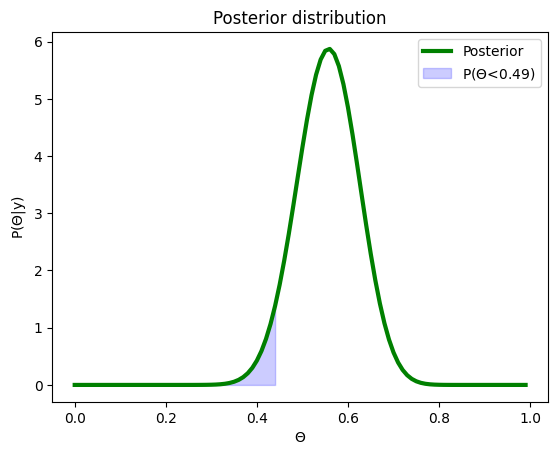

In [14]:
# Let's toss the coin:
k = coin_toss(n, verbose=False)
print(f"We obtained {k} heads out of {n} tosses")
# Now that we have some data, let's compute the posterior:
posterior = [compute_posterior(theta, n, k, alpha, beta)[0] for theta in thetas]

fig, ax = plt.subplots()
# Plot the posterior:
ax.plot(thetas, posterior, 'g', label='Posterior', linewidth=3)
ax.fill_between(
        x=np.arange(0, 0.45, 0.01), 
        y1=[compute_posterior(theta, n, k, alpha, beta)[0] for theta in np.arange(0, 0.45, 0.01)],
        color= "b",
        alpha= 0.2,
        label='P($\\Theta$<0.49)')
ax.set_xlabel('$\\Theta$')
ax.set_ylabel('P($\\Theta$|y)')
ax.set_title(f'Posterior distribution')
plt.legend()
plt.show()
plt.close()

Now let's do the same but for $P(\Theta<=0.51)$

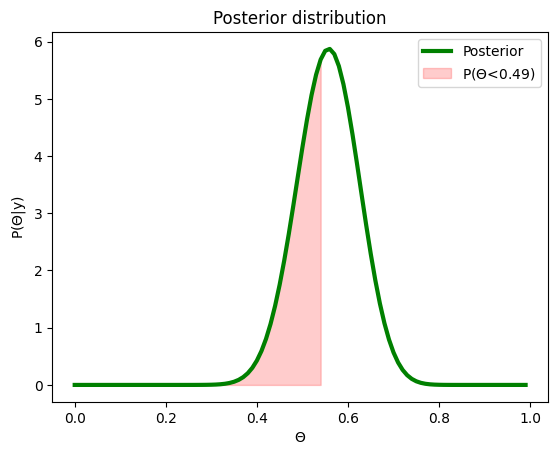

In [15]:
fig, ax = plt.subplots()
# Plot the posterior:
ax.plot(thetas, posterior, 'g', label='Posterior', linewidth=3)
ax.fill_between(
        x=np.arange(0, 0.55, 0.01), 
        y1=[compute_posterior(theta, n, k, alpha, beta)[0] for theta in np.arange(0, 0.55, 0.01)],
        color= "r",
        alpha= 0.2,
        label='P($\\Theta$<0.49)')
ax.set_xlabel('$\\Theta$')
ax.set_ylabel('P($\\Theta$|y)')
ax.set_title(f'Posterior distribution')
plt.legend()
plt.show()
plt.close()

If we take the difference between these two, we get:

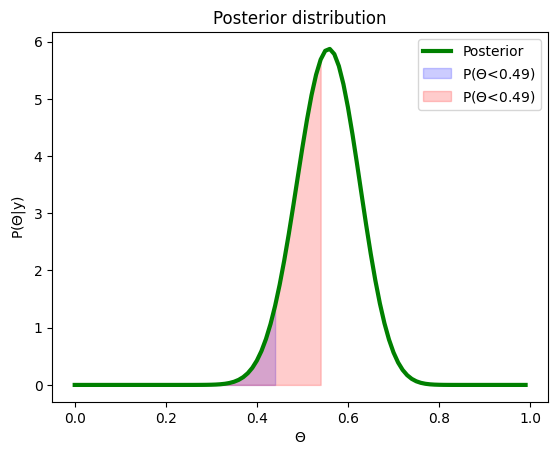

In [16]:
fig, ax = plt.subplots()
# Plot the posterior:
ax.plot(thetas, posterior, 'g', label='Posterior', linewidth=3)
ax.fill_between(
        x=np.arange(0, 0.45, 0.01), 
        y1=[compute_posterior(theta, n, k, alpha, beta)[0] for theta in np.arange(0, 0.45, 0.01)],
        color= "b",
        alpha= 0.2,
        label='P($\\Theta$<0.49)')
ax.fill_between(
        x=np.arange(0, 0.55, 0.01), 
        y1=[compute_posterior(theta, n, k, alpha, beta)[0] for theta in np.arange(0, 0.55, 0.01)],
        color= "r",
        alpha= 0.2,
        label='P($\\Theta$<0.49)')
ax.set_xlabel('$\\Theta$')
ax.set_ylabel('P($\\Theta$|y)')
ax.set_title(f'Posterior distribution')
plt.legend()
plt.show()
plt.close()

That's right, when we take the difference between $P(\Theta<= 0.55) - P(\Theta<= 0.45)$ we get the probability of $P(0.45<=\Theta<= 0.55)$, as we remove everything that is common to both (the area overlapping between the two on the graph above). So this means that to obtain the probability of our theta value being within a specific range, we need to integrate the posterior again, once for each of the bounds of our range:

$$P(0.45<=\Theta<= 0.55) = \int_{\Theta=0}^{0.55}{P(\Theta|y)d\Theta} - \int_{\Theta=0}^{0.45}{P(\Theta|y)d\Theta}$$

Yes, sorry, we aren't yet done with our integrals and complicated maths (though to be fair, I did warn you above). We started from:

$$P(\Theta|y) = \frac{P(y|\Theta)P(\Theta)}{P(y)}$$

And we figured out that we can shuffle things around to simplify the operations required to get the numerator and the denominator. And we obtained something like this:

$$P(\Theta|y) = \frac{\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}{\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\times\frac{\Gamma(k+\alpha)\Gamma(n-k+\beta)}{\Gamma(k+\alpha+n-k+\beta)}}$$

Where:

$$\alpha' = k+\alpha$$

$$\beta' = n-k+\beta$$

And we need to figure out the integral of that somehow. 

Yeah okay, this is one beefy formulae, and it is normal to feel very intimidated by it. How on earth can we figure out what the integral of this monstrosity should be? Once again, we will use a bunch of relatively simple tricks to make this thing more palatable. And if we are lucky, once we have done so, we will realize that maybe finding the integral isn't as bad as it sounds. 

Okay so first things first, in the denominator, it turns out that everything we have between parantheses is also $\alpha'$ and $\beta'$:

$$P(\Theta|y) = \frac{\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}{\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\times\frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha'+\beta')}}$$

Now that looks a little bit better. Now you probably noticed something else: we have both in the numerator and the denominator this C constant $\binom{n}{k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}$. Even if it's within an integral, that also cancels out:

$$P(\Theta|y) = \frac{\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}{\frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha'+\beta')}}$$

Now wait a minute, doesn't that looks familiar? Yes, we have seen it before. Remember when we tried to define what function we should use for our prior, we said that the beta distribution is a good choice, because it is the conjugate of the Binomial distribution. And we defined the Beta distribution like so:

$$f(\Theta) = \frac{\Theta^{\alpha-1}(1-\Theta)^{\beta-1}}{B(\alpha, \beta)}$$

Where:

$$B(\alpha, \Beta)=\frac{\Gamma(\alpha)\Gamma(\Beta)}{\Gamma(\alpha+\beta)}$$

So in other words, the posterior distribution is also a beta distribution. This should be too surprising, as we said that a conjugate prior is a prior that yields a posterior of the same distribution family. And so here is the proof of that: we have the C part that simplifies both on the numerator and denominator, which leaves us with a beta function on the top and the integral thereof at the denominator, making the beta function a beta distribution. 

### Aside: a simplified version of the posterior
This is a bit of an aside, but this highlights why it is always useful to do the maths to simplify expressions as much as possible. Previously, we stopped simplifying the operation at the point where we felt that we could compute the numerator and the denominator easily enough, and then just divide one by the other. And that worked nicely. But with what we just saw, it should be obvious that there is a much simpler way to compute the posterior: just calculate the new values $\alpha'$ and $\beta'$, which are simple addition and subtractions based on our parameters, and that's enough to get the posterior distribution. There is no magic nor super duper complicated maths, just simple raranging of the terms and figuring out what we can simplify. We can accordingly write a new function that computes the posterior like so:

In [17]:
def compute_posterior(theta, n, k, alpha, beta):
    """
    Computes the posterior distribution of a parameter given a binomial likelihood and a Beta prior.
    
    Parameters:
    theta (float): The value at which to evaluate the posterior distribution.
    n (int): Total number of trials (e.g., flips in a coin-toss experiment).
    k (int): Number of observed successes (e.g., heads in coin tosses).
    alpha (float): Alpha parameter of the Beta prior distribution.
    beta (float): Beta parameter of the Beta prior distribution.

    Returns:
    float: The probability density of the posterior distribution evaluated at the given theta.
    
    Notes:
    - The function calculates the posterior as a Beta distribution with updated parameters:
        - alpha' = k + alpha
        - beta' = n - k + beta
    - The posterior distribution follows a Beta(alpha', beta') distribution.
    - This function assumes `beta_distribution` is defined elsewhere and represents the Beta distribution PDF.
    """
    alpha_prime = k + alpha
    beta_prime = n-k+beta
    return beta_distribution(theta, alpha_prime, beta_prime)

### The integral of the simplified posterior:
Okay, back to the integral, so now we have this:

$$P(\Theta|y) = \frac{\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}{\frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha'+\beta')}}$$

Which is equivalent to this:

$$P(\Theta|y) = {\frac{\Gamma(\alpha'+\beta')}{\Gamma(\alpha')\Gamma(\beta')}}\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}$$

Okay, now we are cooking. We need to solve this:

$$\int_{\Theta=0}^{x}{P(\Theta|y)} = \int_{\Theta=0}^{x}{{\frac{\Gamma(\alpha'+\beta')}{\Gamma(\alpha')\Gamma(\beta')}}\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}d\Theta$$

Same trick as before, we can take out the parts that don't contain $\Theta$:
$$\int_{\Theta=0}^{x}{P(\Theta|y)} = \frac{\Gamma(\alpha'+\beta')}{\Gamma(\alpha')\Gamma(\beta')}\times\int_{\Theta=0}^{x}{\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}d\Theta$$

Once again, some bits of this equation may seem familiar. As we were trying to figure out the marginal likelihood, we also had to figure out a similar integral. And we got out of it by realizing that the beta function is defined like so (we didn't exactly figure it out ourselves, but we referred to the [wikipedia](https://en.wikipedia.org/wiki/Beta_function) page with the proof):

$$\int_{0\Theta=0}^{x}{\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}d\Theta = \frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha'+\beta')}$$

You might be tempted to write:

$$\int_{\Theta=0}^{x}{P(\Theta|y)} = \frac{\Gamma(\alpha'+\beta')}{\Gamma(\alpha')\Gamma(\beta')}\times\frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha'+\beta')}$$

In which case everything sums up to 1. That's however **wrong** (or at east not generally true, only in a very specific case). The equality of the beta function (i.e. the integral of the thing with exponent is equal to the gamma function times itself divided by the gamma function) only holds when we integrate from 0 to 1. And when you think about it, it makes sense: if you integrate from 0 to 1, then the integral must be 1 because it is a probability distribution, so you would expect everything to cancel out that way. But since we are interested in finding  the probability of $\Theta$ to be under a specific probability, we need to find a solution to the equation such that it works to integrate up to any values of i.

This is unfortunately where things start to be a little confusing, and we will need to once again adjust our notation. We will write the beta function as so:

$$\Beta(\alpha, \beta) = \int_{\Theta=0}^{x}\Theta^{\alpha -1}(1-\Theta)^{\beta-1} = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$

So we can rewrite our formulae above like so:

$$\int_{\Theta=0}^{x}{P(\Theta|y)} = \frac{1}{\Beta(\alpha', \beta')}\times\int_{\Theta=0}^{x}{\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}d\Theta$$

The integral on the right handside is known as the incomplete beta function up to i, which is written as:

$$\int_{\Theta=0}^{x}{\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}}d\Theta = \Beta(x; \alpha, \beta)$$

Unfortunately, **there is no closed-form expression** for the incomplete beta function. What that means is that there is no way to simplify the expression to something that can easily be computed as we have done so far. The only thing we can do is either brut-force: take the sum of the values obtained from 0 to i in tiny tiny steps and hope that that's sufficient to get close to the true value. Or we can use other mathematical tricks to find another function that is easy to work with and that should approximate the value the function of interest would take in the range of interest. Either way, let's not worry about it too much for now. Based on the two functions we have defined, we can rewrite the integral we are interested in as:

$$\int_{\Theta=0}^{x}{P(\Theta|y)} = \frac{\Beta(x; \alpha', \beta')}{\Beta(\alpha', \beta')}$$

You might say, that doesn't really help, it's just the same written different. You would be right, it doesn't change anything. But it turns out that this function, the ratio of an incomplete beta function normalized by the complete beta function is yet another function with a specific name: the **regularized incomplete beta function**. And in general, in math, functions that received a name are typically very useful but very difficult to figure out, such that when the same formulae pops up in other problems, it can quickly be recognized and the solution that was figured out by other people can simply be applied without having to reinvent the wheel. The **regularized incomplete beta function** is written like so:

$$I_{x}(\alpha, \beta)$$

Again, this is not a function that can simply be solved, and it would go beyond the scope of this book to dig further into it. But the fact that that function has a name means other people were interested enough in it to find a solution (or rather an approximation). This means that if we want to find the integral of our posterior, we can simply rely on that solution other people found.

### The integral of a probability distribution, a.k.a. the cummulative distribution function
So far, we have been dealing with probability distribution, with the understanding that such function give us for any value of a parameter (in our case $\Theta$ or the probability of heads for our coin), it returns the probability of that parameter. These are what we call **probability mass function (PMF)** if our parameter is a discrete variable and a **probability density function (PDF)** if our parameter is continuous. But we have realized that what would be interesting to know based on our prior is what is the probability of $\Theta$ being within a range of interest. And we figured out that this require taking the difference between the integral of the probability for each limit of our range. For our particular problem, we determined that the integral of the probability up to a given value of $\Theta=x$ is the **regularized incomplete beta function**. Importantly, the integral of a probability distribution function has another name: **The cummulative distribution function or CDF**. In contrast to the PDF which returns for each value of $\Theta$ the probability of that particular value, the CDF returns for each value of $\Theta$ the probability of $\Theta$ to be this or less than this. 

So this means that for a beta distribution, the cummulative distribution function is the **regularized incomplete beta function**. And if we want to know the probability of $\Theta$ to be within a particular range, we need to simply do: 

$$P(0.45<=\Theta<=0.55) = CDF(0.55) - CDF(0.45)$$

The reason I am mention this is because if you know the type of distribution you are dealing with and its parameter, you can simply look online for what the **Cummlative distribution function** of that distribution is, rather than having to figure out all the maths to arrive at the conclusion 'In the case of the beta distribution, I need to use the regularized incomplete beta function, hopefully someone figured it out'. You can instead simply look for 'What is the CDF of a beta distribution', that should be quicker, way less math involved. And as it turns out, for most probability distribution families, the CDF is readily implemented in stats packages. 

So with all that being said, we can now very easily compute the probability of $P(0.45<=\Theta<=0.55)$, we just need to solve this:

$$P(0.45<=\Theta<= 0.55) = \int_{\Theta=0}^{0.55}{P(\Theta|y)d\Theta} - \int_{\Theta=0}^{0.45}{P(\Theta|y)d\Theta}$$

$$P(0.45<=\Theta<= 0.55) = I_{0.55}(\alpha', \beta') - I_{0.45}(\alpha', \beta')$$

Where

$$\alpha' = k+\alpha$$

$$\beta' = n-k+\beta$$

But instead of looking in python for an implementation of the **regularized incomplete beta function**, we can simply look for the beta distribution CDF. It shouldn't take you long to land on this [page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) and there you can see the CDF! We can very simply illustrate what that function looks like to get a better intuition (we just need to be careful about the meaning of the parameters in scipy, which are a bit different from the way we have implemented it so far):

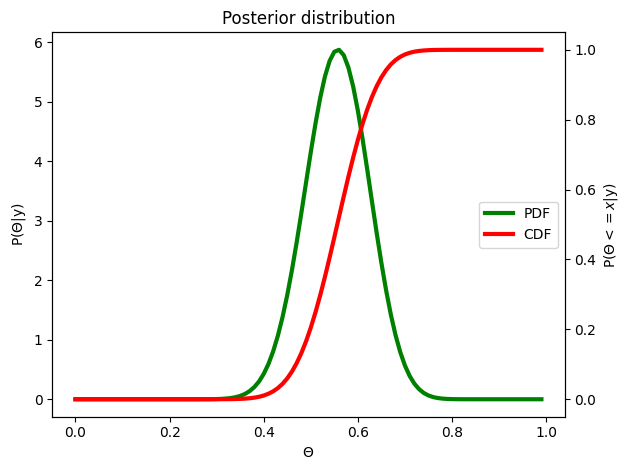

In [18]:
from scipy.stats import beta as beta_scipy
thetas = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
ax2 = plt.twinx()
# Plot the posterior:
ax.plot(thetas, [compute_posterior(theta, n, k, alpha, beta) for theta in thetas], 'g', label='PDF', linewidth=3)
ax2.plot(thetas, [beta_scipy.cdf(theta, alpha+k, beta+n-k) for theta in thetas], 'r', label='CDF', linewidth=3)
ax.set_xlabel('$\\Theta$')
ax.set_ylabel('P($\\Theta$|y)')
ax2.set_ylabel('P($\\Theta <= x$|y)')
ax.set_title(f'Posterior distribution')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc=5)
plt.tight_layout()
plt.show()
plt.close()

Hopefully this makes sense, the CDF is basically summing up all the values under the green curve up until that point

In [19]:
from scipy.stats import beta as beta_scipy

def proba_theta_range(min, max, n, k, alpha, beta):
    """
    Computes the probability that the parameter θ (Theta) falls within a specified range
    [min, max] given a Beta posterior distribution, which is updated based on observed 
    data and prior parameters.

    Parameters:
    ----------
    min : float
        The lower bound of the range for θ.
    max : float
        The upper bound of the range for θ.
    n : int
        The total number of trials or observations.
    k : int
        The number of observed successes.
    alpha : float
        The shape parameter α of the Beta prior distribution.
    beta : float
        The shape parameter β of the Beta prior distribution.

    Returns:
    -------
    float
        The probability that θ falls within the specified range [min, max] under
        the Beta posterior distribution.
    
    Notes:
    -----
    - This function calculates the posterior distribution parameters α' and β' based
      on the observed data (n and k) and the Beta prior parameters (α and β):
        α' = α + k
        β' = β + n - k
    - The probability is computed using the cumulative distribution function (CDF)
      of the Beta distribution:
        P(min ≤ θ ≤ max | y) = CDF(max) - CDF(min)
    """
    alpha_prime = k + alpha
    beta_prime = n-k+beta
    return beta_scipy.cdf(max, alpha_prime, beta_prime) - beta_scipy.cdf(min, alpha_prime, beta_prime)

So now, if we want to find the probability for our parameter to be between 0.45 and 0.55, we can get a simple answer:

In [20]:
print(f"P(0.45 <= $\\Theta$ <= 0.55)={proba_theta_range(0.45, 0.55, n, k, alpha, beta)}")

P(0.45 <= $\Theta$ <= 0.55)=0.4036507504715131


We can be 53% confident that the true value of $\Theta$ is between 0.45 and 0.55 (note that the values will depend on the outcome of your coin toss, there is some randomness after all ;). Do you want to proceed with your bet? You aren't 99% sure that it is within a comfortable range. Let's see how confident you can be that it is between 0.4 and 0.6?

In [21]:
print(f"P(0.40 <= $\\Theta$ <= 0.60)={proba_theta_range(0.40, 0.60, n, k, alpha, beta)}")

P(0.40 <= $\Theta$ <= 0.60)=0.7314485372625755


Yeah okay, 86%. Do you think you should proceed with your bet? Now of course, the answer depends quite a bit on what the bet is about. If you are betting who goes buy coffee beans for the office next, that's probably good enough, but if you are betting 1000€, you might want to collect a bit more data. But at least now we have a straight forward and complete answer to our question! Congrats, we've made it.

# Summary
We have seen quite a lot up until now, and this chapter was a bit much. So let's recapitulate what we have seen so far. We started with our simple question: **Is our coin biased**? Which is equivalent to asking **Is the probability of getting head of 0.5**? Which is written $P(X=1)=0.5$. We then saw that we can run an experiment to obtain data that should help to answer our question. But we realized that the results of our experiment shouldn't be trusted and that the only thing we can know from our experiment is the probability of our data under different value of $P(X=1)$, which we call the **likelihood**, which is described as $P(y|\Theta)$. We said that $\Theta$ is just the general notation to describe any parameters we are interested in.

Then, in this chapter, we introduced the Bayes theorem, which enables us to go from data and their likelihood $P(y|\Theta)$ to something called the **posterior**, which is the probability of our parameter of interest given the data, $P(\Theta|y)$. The reason we are interested in this posterior is because it is the closest we can get from getting a straight answer to our original question **Is our coin biased?** based on experimental data, by telling us how confident we can be that a given value of $\Theta$ is equal to the true value of $\Theta$ given our experimental data. In other words, the posterior tells us the probability of every value of $\Theta$ after seeing the data. If the values close to $\Theta=0.5$ are highly probable, then we have evidence that our coin isn't biased. We saw that the Bayes theorem enables to go from the likelihood to the posterior by multiplying the likelihood by the **prior** and dividing the whole by something called the **marginal liklelihood or model evidence**. This is written like so:

$$P(\Theta|y) = \frac{P(y|\Theta)P(\Theta)}{P(y)}$$

Along the way we introduced the concepts of probability distrubution. Each term in the Bayes theorem is a probability distribution:
- $P(y|\Theta)$ (Likelihood): Probability of the data for each value of $\Theta$
- $P(\Theta)$ (Prior): Probability of each value of  $\Theta$ based on our own belief (or generally previous knowledge before seeing any data)
- $P(y)$ (Posterior): Probability of the data after marginalizing over all values of $\Theta$
- $P(\Theta|y)$ (Posterior): Probability of each value of our parameter after we saw the data

In general, the function to use for the likelihood depends on the data we are describing. In the case of our coin toss problem, the Binomial distribution is the likelihood function to describe the probabiltiy of each possible number of heads out of a given number of coin tosses. In contrast, there are many probability distribution that can be used to specify our prior. Which one to choose depends on the prior, because some prior can combine with the likelihood in ways that are easy to deal with mathetmatically. And if if exists for the likelihood applicable to our problem, we should strive to find a prior distribution that combines with the likelihood to return the same distribution family as the prior. This is what we call a conjugate prior, and it is very handy because then, we only need to figure out how to update the same parameters as our prior distribution to solve the equation. In the case of a binomial distribution, the beta is the conjugate. Everything we did from there on was play around with the mathematical formulae to obtain our prior.

Importantly, when working with Bayesian inference, you won't have to do all the maths we did above. Scientists have been working with Bayesian stats for decades and have figured out many useful cases already. The reason we went through this exercise is just to get rid of the math-phobia and the feeling of 'not understanding anything if I can't follow each of the steps'. In most tutorial that illustrate Bayes stats with the binomial distribution (for coin tosses or else), they simply say something like this:

$$P(\Theta|y) = \frac{P(y|\Theta)P(\Theta)}{P(y)}$$

So:

$$P(\Theta|y) = {\frac{\Gamma(\alpha'+\beta')}{\Gamma(\alpha')\Gamma(\beta')}}\times\Theta^{\alpha' -1}(1-\Theta)^{\beta'-1}$$

Or maybe they rely on code and simply say:

In [22]:
def compute_posterior(theta, n, k, alpha, beta):
    """
    Computes the posterior distribution of a parameter given a binomial likelihood and a Beta prior.
    
    Parameters:
    theta (float): The value at which to evaluate the posterior distribution.
    n (int): Total number of trials (e.g., flips in a coin-toss experiment).
    k (int): Number of observed successes (e.g., heads in coin tosses).
    alpha (float): Alpha parameter of the Beta prior distribution.
    beta (float): Beta parameter of the Beta prior distribution.

    Returns:
    float: The probability density of the posterior distribution evaluated at the given theta.
    
    Notes:
    - The function calculates the posterior as a Beta distribution with updated parameters:
        - alpha' = k + alpha
        - beta' = n - k + beta
    - The posterior distribution follows a Beta(alpha', beta') distribution.
    - This function assumes `beta_distribution` is defined elsewhere and represents the Beta distribution PDF.
    """
    alpha_prime = k + alpha
    beta_prime = n-k+beta
    return beta_distribution(theta, alpha_prime, beta_prime)

And you are left confused, wondering 'how on earth do we go from the Bayes theorem to this?!'. Now you know for this particular example. When dealing with other likelihood and prior distributions, the exact maths behind it are different, but it's not black magic. And sure, it might be beyond your mathematical skills to understand and follow, but at least you now know in principle how that works.

However, one of the reason why Bayesian stats are so notoriously difficult is that there aren't many cases in which we can find solution as easily as we did for our example. That may sound daunting if the above didn't feel that easy. That's normal. After all, the above wasn't exactly easy, it took us hundreds of lines of code, text and equations to get through. But at least we got to a solution in the end, and hopefully using maths that are familiar to most. The thing is that for many interesting problems, there are no easy conjugate priors that play well with the likelihood function of the data, and in many cases, there are **no analytical solutions**, which means we can't just solve the equation, as we will see in the next chapter. But now that you know how things play out for cases in which we can find a solution, you should be able to understand why in some cases, we can't find one, which should make it easy to understand why we need **variational Laplace** for, which should in turn make it easier to understand it. Pfiou, quite a program, hey?